In [12]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
df = pd.read_csv('./China.csv')

In [29]:
df.head()

,Unnamed: 0,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Population,Susceptiple,Log susceptiple,Decresed susceptiple
0,0,2020-01-22,548,17,28,503,0,0,0,1438207241,1438206693,21.086663,0
1,1,2020-01-23,643,18,30,595,95,1,2,1438207241,1438206598,21.086663,95
2,2,2020-01-24,920,26,36,858,277,8,6,1438207241,1438206321,21.086663,277
3,3,2020-01-25,1406,42,39,1325,486,16,3,1438207241,1438205835,21.086662,486
4,4,2020-01-26,2075,56,49,1970,669,14,10,1438207241,1438205166,21.086662,669


In [30]:
# The SIR model differential equations.
def deriv(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [31]:
# Number of days
n_days = len(df)
# Total population, N.
N = df['Population'][0]
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = (df['Active'][0])/N, (df['Deaths'][0] + df['Recovered'][0])/N
# Everyone else, S0, is susceptible to infection initially.
S0 = 1 - I0 - R0
# A grid of time points (in days)
t = [i for i in range(n_days)]

In [32]:
# Initial conditions vector
y0 = S0, I0, R0
print(y0)

(0.9999996189700731, 3.4974097310917375e-07, 3.128895385668553e-08)


In [33]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import time
from datetime import datetime
from scipy import integrate, optimize
import warnings
warnings.filterwarnings('ignore')

# ML libraries
import lightgbm as lgb
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

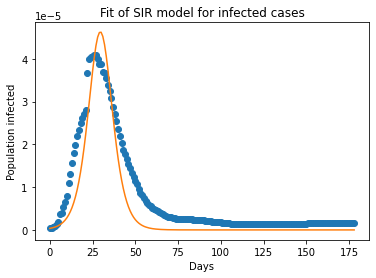

Optimal parameters: beta = 22.0873514749985  and gamma =  21.87594027962538


In [34]:
ydata = df['Active']/N

def fit_odeint(t, beta, gamma):
    return integrate.odeint(deriv, y0, t, args=(beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
I = fit_odeint(t, *popt)
beta, gamma = popt[0], popt[1]

plt.plot(t, ydata, 'o')
plt.plot(t, I)
plt.title("Fit of SIR model for infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])


In [35]:
# Integrate the SIR equations over the time grid, t.
ret = integrate.odeint(deriv, y0, t, args=(beta, gamma))
S, I, R = ret.T

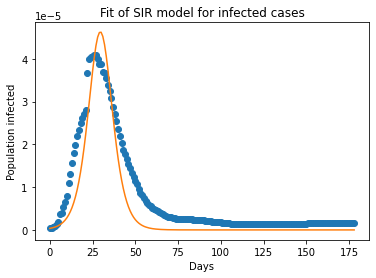

In [36]:
plt.plot(t, ydata, 'o')
plt.plot(t, I)
plt.title("Fit of SIR model for infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()

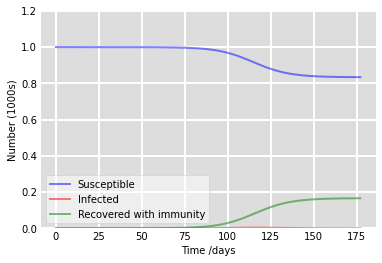

In [11]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()